In [1]:
import pandas as pd
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [2]:
df.shape
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [5]:
df.sample(5)

,Unnamed: 0,headline,url,publisher,date,stock
163296,164374,27 Medical Devices Stocks Moving In Monday's S...,https://www.benzinga.com/intraday-update/20/01...,Benzinga Newsdesk,2020-01-27 00:00:00,BIOL
560758,563733,Stocks Which Set New 52-Week Low The Prior Tra...,https://www.benzinga.com/news/18/11/12750171/s...,Benzinga Newsdesk,2018-11-26 00:00:00,GMO
207573,208935,Benzinga Pro's 7 Stocks To Watch Today,https://www.benzinga.com/news/18/01/11100886/b...,Jayson Derrick,2018-01-30 00:00:00,CALD
1172957,1178657,Bank of America Downgrades Spirit Realty Capit...,https://www.benzinga.com/news/18/02/11258046/b...,Eddie Staley,2018-02-26 00:00:00,SRC
1118910,1124416,New 52-Week Lows For Monday Morning,https://www.benzinga.com/news/19/08/14202224/n...,Lisa Levin,2019-08-05 00:00:00,SEMG


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))

df['headline_length'].describe()


count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

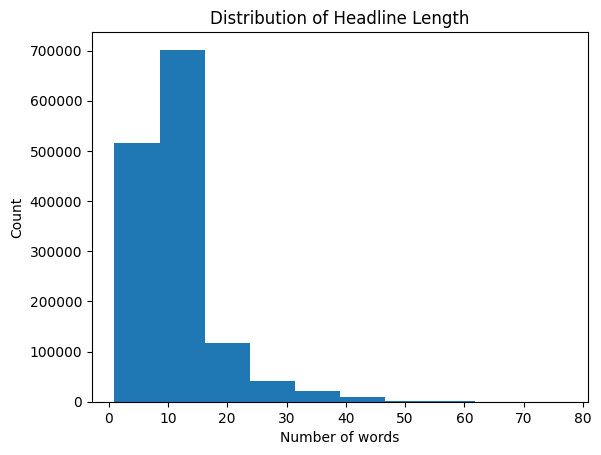

In [10]:
plt.hist(df['headline_length'])
plt.title("Distribution of Headline Length")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()


In [11]:
publisher_counts = df['publisher'].value_counts()

publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

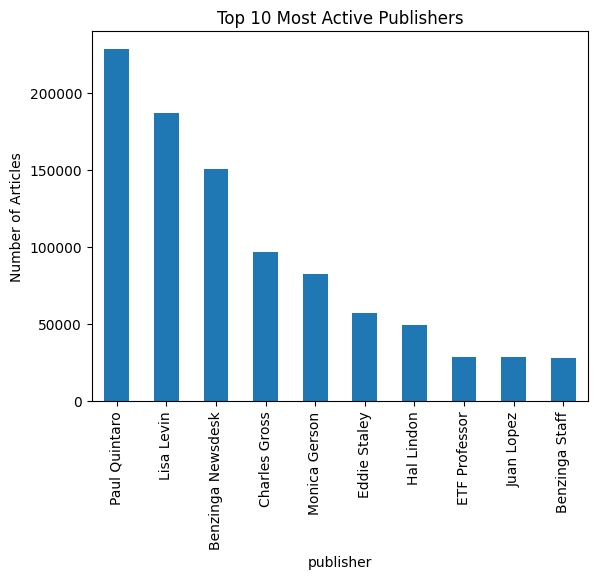

In [12]:
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Number of Articles")
plt.show()


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
invalid = df[df['date'].isna()]
invalid


# df['date'].head(20)




,Unnamed: 0,headline,url,publisher,date,stock,headline_length
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,NaT,A,7
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,NaT,A,12
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,NaT,A,7
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,NaT,A,16
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,NaT,A,14
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,7
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,7
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,8
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,8


In [14]:
# Extract time components for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['date_only'] = df['date'].dt.date  # For daily aggregation
df['month_year'] = df['date'].dt.to_period('M')  # For monthly aggregation

/tmp/ipykernel_14806/2316502035.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['date'].dt.to_period('M')  # For monthly aggregation


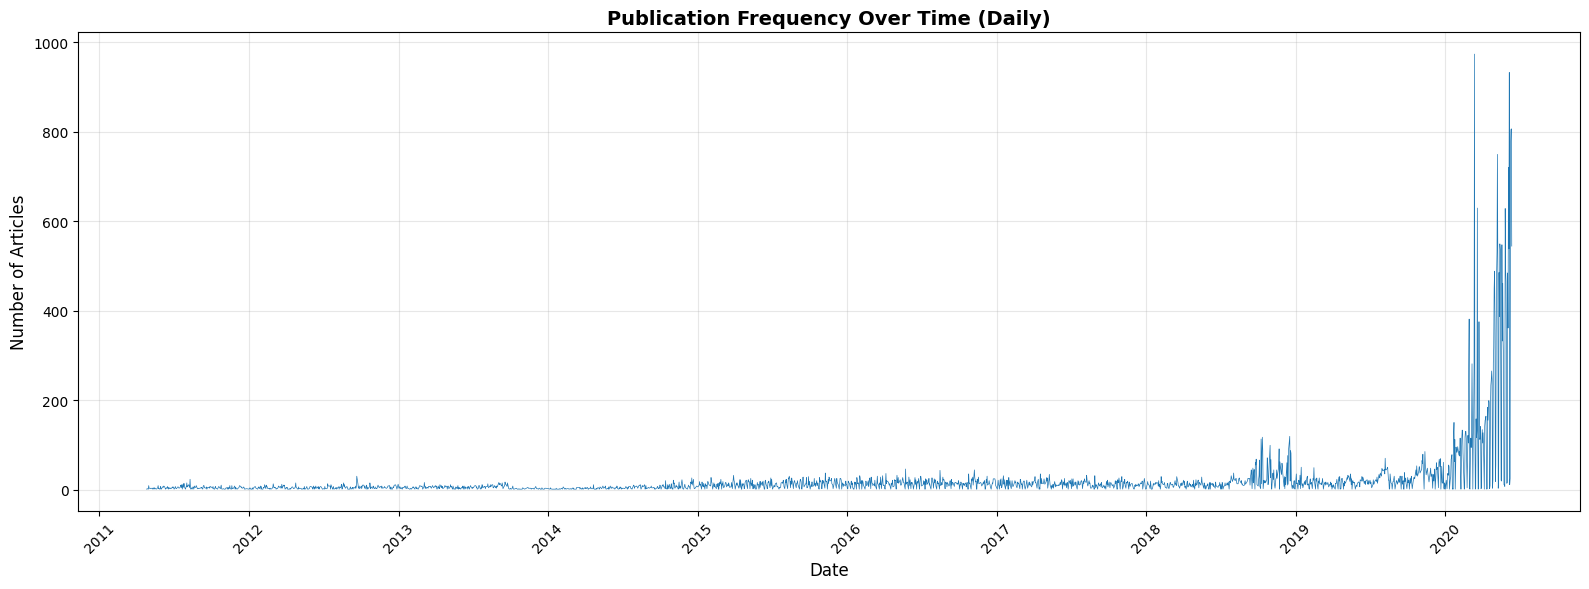

DAILY PUBLICATION STATISTICS
Mean articles per day: 22.15
Median articles per day: 9.00
Max articles in a day: 973
Date with max articles: 2020-03-12
Min articles in a day: 1
Date with min articles: 2011-04-27
Standard deviation: 68.14


In [15]:
# 1. Daily Publication Frequency Over Time
daily_counts = df.groupby('date_only').size()

# Plot daily trends
plt.figure(figsize=(16, 6))
daily_counts.plot(kind='line', linewidth=0.5)
plt.title('Publication Frequency Over Time (Daily)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("=" * 60)
print("DAILY PUBLICATION STATISTICS")
print("=" * 60)
print(f"Mean articles per day: {daily_counts.mean():.2f}")
print(f"Median articles per day: {daily_counts.median():.2f}")
print(f"Max articles in a day: {daily_counts.max()}")
print(f"Date with max articles: {daily_counts.idxmax()}")
print(f"Min articles in a day: {daily_counts.min()}")
print(f"Date with min articles: {daily_counts.idxmin()}")
print(f"Standard deviation: {daily_counts.std():.2f}")

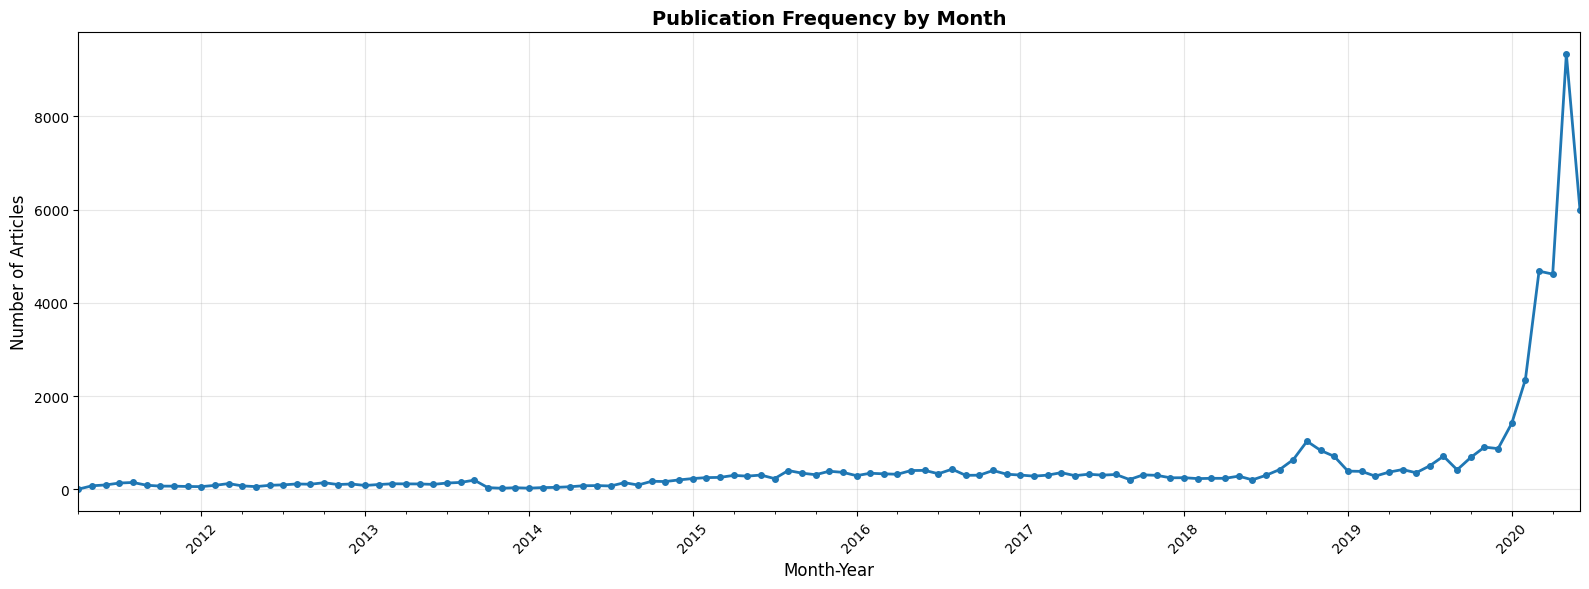


MONTHLY STATISTICS
Month with most articles: 2020-05 (9333 articles)
Month with least articles: 2011-04 (6 articles)


In [16]:
# 2. Monthly Trends
monthly_counts = df.groupby('month_year').size()

plt.figure(figsize=(16, 6))
monthly_counts.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('Publication Frequency by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("MONTHLY STATISTICS")
print("=" * 60)
print(f"Month with most articles: {monthly_counts.idxmax()} ({monthly_counts.max()} articles)")
print(f"Month with least articles: {monthly_counts.idxmin()} ({monthly_counts.min()} articles)")

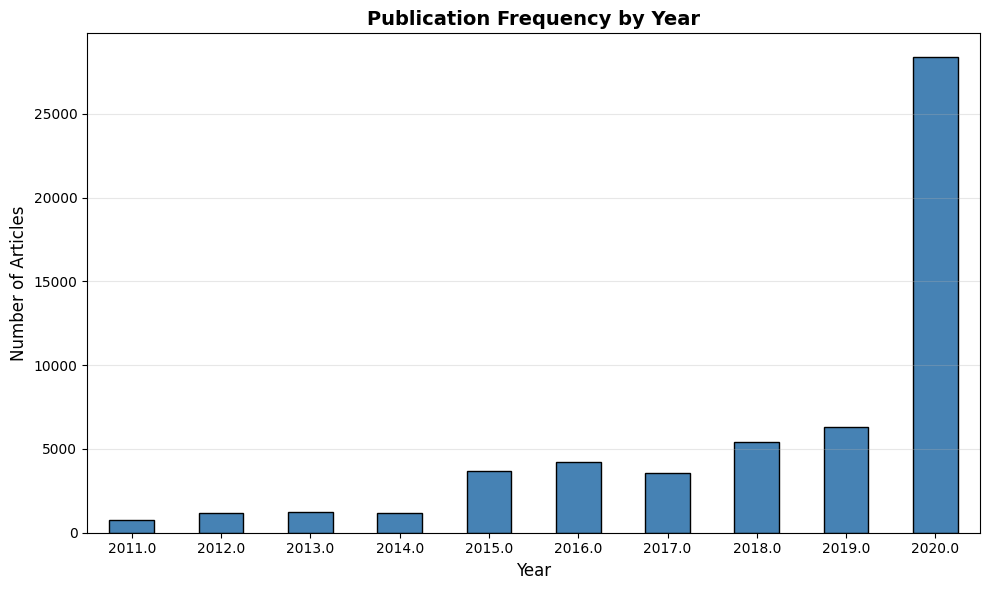


YEARLY STATISTICS
2011.0: 760 articles
2012.0: 1,187 articles
2013.0: 1,240 articles
2014.0: 1,189 articles
2015.0: 3,695 articles
2016.0: 4,223 articles
2017.0: 3,581 articles
2018.0: 5,395 articles
2019.0: 6,325 articles
2020.0: 28,392 articles


In [18]:
# 3. Yearly Trends
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Publication Frequency by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("YEARLY STATISTICS")
print("=" * 60)
for year, count in yearly_counts.items():
    print(f"{year}: {count:,} articles")

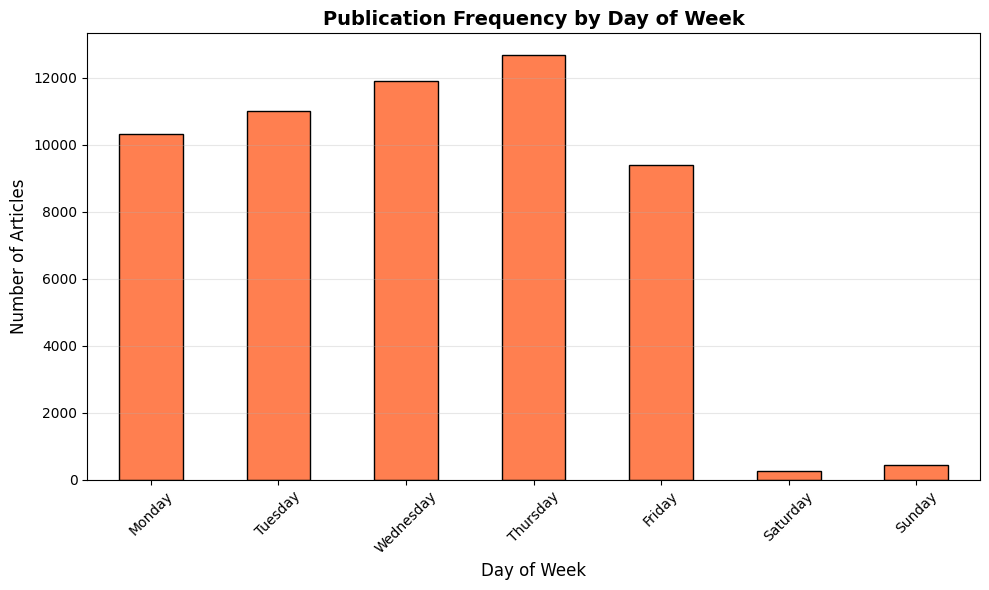


DAY OF WEEK STATISTICS
Monday: 10,322 articles (0.73%)
Tuesday: 11,002 articles (0.78%)
Wednesday: 11,891 articles (0.84%)
Thursday: 12,688 articles (0.90%)
Friday: 9,381 articles (0.67%)
Saturday: 267 articles (0.02%)
Sunday: 436 articles (0.03%)

Most active day: Thursday
Least active day: Saturday


In [19]:
# 4. Day of Week Patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Publication Frequency by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DAY OF WEEK STATISTICS")
print("=" * 60)
for day, count in day_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{day}: {count:,} articles ({percentage:.2f}%)")
print(f"\nMost active day: {day_counts.idxmax()}")
print(f"Least active day: {day_counts.idxmin()}")

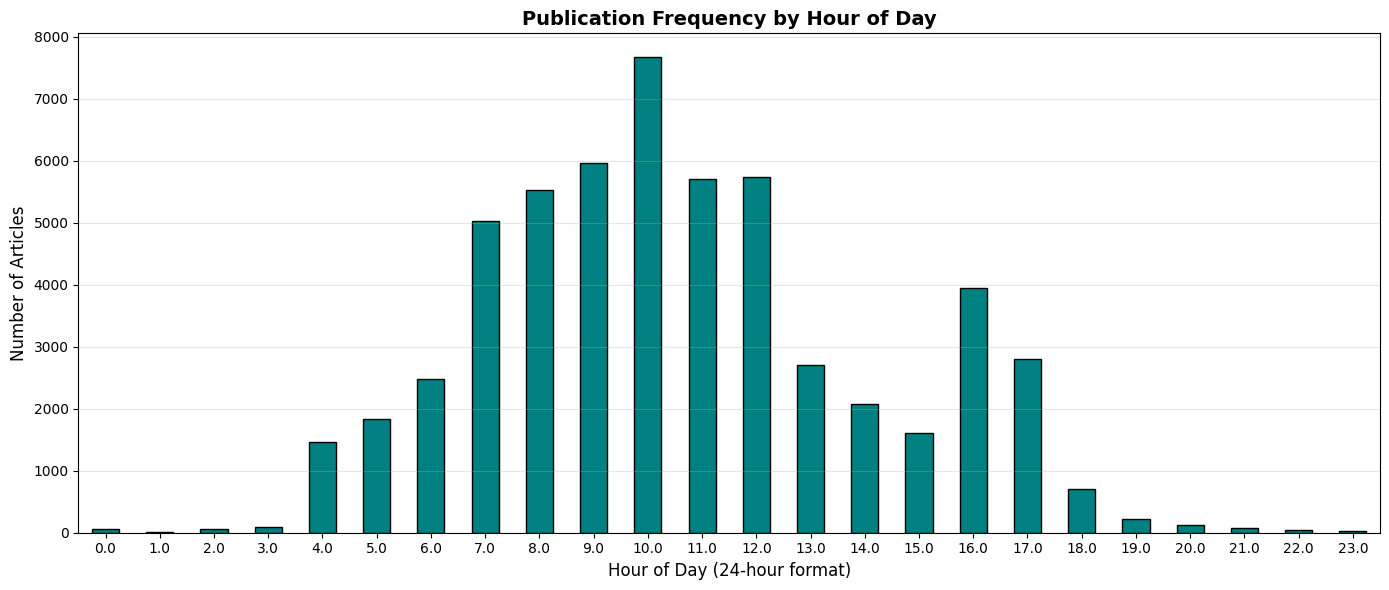


PUBLISHING TIME STATISTICS
Peak publishing hour: 10.0:00 (7,669 articles)
Least active hour: 1.0:00 (14 articles)

Articles during business hours (9 AM - 5 PM): 38,203 (2.71%)
Articles outside business hours: 1,369,125 (97.29%)


In [20]:
# 5. Hour of Day Analysis (Publishing Time Patterns)
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
hour_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Publication Frequency by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PUBLISHING TIME STATISTICS")
print("=" * 60)
print(f"Peak publishing hour: {hour_counts.idxmax()}:00 ({hour_counts.max():,} articles)")
print(f"Least active hour: {hour_counts.idxmin()}:00 ({hour_counts.min():,} articles)")

# Identify business hours vs non-business hours
business_hours = df[df['hour'].between(9, 17)]
non_business = df[~df['hour'].between(9, 17)]
print(f"\nArticles during business hours (9 AM - 5 PM): {len(business_hours):,} ({(len(business_hours)/len(df)*100):.2f}%)")
print(f"Articles outside business hours: {len(non_business):,} ({(len(non_business)/len(df)*100):.2f}%)")

PUBLICATION SPIKES DETECTION
Total spike days (z-score > 2): 51

Top 10 Days with Most Articles (Potential Market Events):
------------------------------------------------------------
2020-03-12: 973 articles (z-score: 13.96)
2020-06-05: 932 articles (z-score: 13.35)
2020-06-10: 806 articles (z-score: 11.51)
2020-06-09: 804 articles (z-score: 11.48)
2020-06-08: 765 articles (z-score: 10.90)
2020-05-07: 749 articles (z-score: 10.67)
2020-06-03: 720 articles (z-score: 10.24)
2020-03-19: 629 articles (z-score: 8.91)
2020-05-26: 628 articles (z-score: 8.89)
2020-05-13: 549 articles (z-score: 7.73)


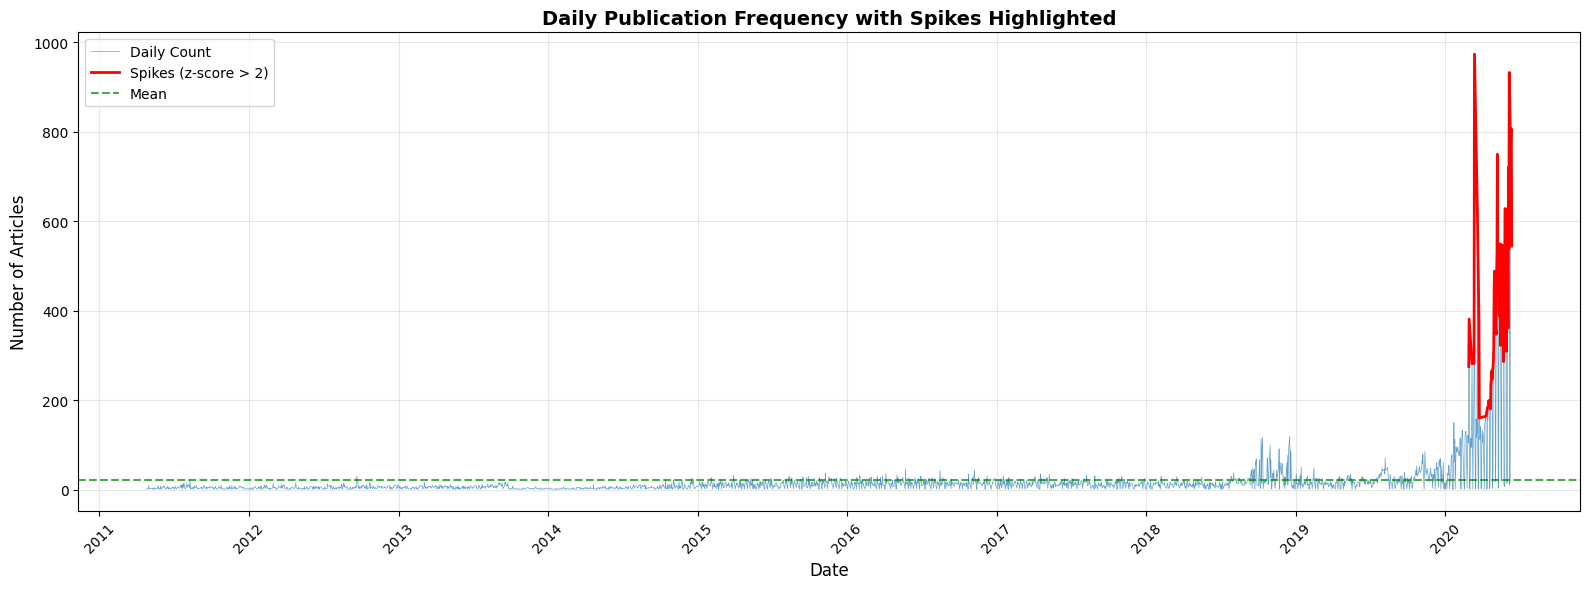

In [21]:
# 6. Identify Spikes and Anomalies (Days with Unusually High Publication Counts)
from scipy import stats

# Calculate z-scores to find outliers

z_scores = stats.zscore(daily_counts)
spike_threshold = 2  # Articles with z-score > 2 are considered spikes
spikes = daily_counts[z_scores > spike_threshold]

print("=" * 60)
print("PUBLICATION SPIKES DETECTION")
print("=" * 60)
print(f"Total spike days (z-score > {spike_threshold}): {len(spikes)}")
print(f"\nTop 10 Days with Most Articles (Potential Market Events):")
print("-" * 60)
top_spikes = daily_counts.sort_values(ascending=False).head(10)
for date, count in top_spikes.items():
    z_score = z_scores[daily_counts.index == date][0]
    print(f"{date}: {count:,} articles (z-score: {z_score:.2f})")

# Visualize spikes
plt.figure(figsize=(16, 6))
daily_counts.plot(kind='line', linewidth=0.5, alpha=0.7, label='Daily Count')
if len(spikes) > 0:
    spikes.plot(kind='line', linewidth=2, color='red', label=f'Spikes (z-score > {spike_threshold})')
plt.axhline(y=daily_counts.mean(), color='green', linestyle='--', label='Mean', alpha=0.7)
plt.title('Daily Publication Frequency with Spikes Highlighted', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words("english"))

def clean_and_extract_words(text):
    # keep only letters
    words = re.findall(r'\b[a-zA-Z]+\b', str(text).lower())
    # remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


TOP 30 BIGRAMS (2-WORD PHRASES)
reports eps: 51,406
price target: 47,274
benzinga top: 44,259
stocks moving: 40,032
mid day: 37,324
market update: 33,101
earnings scheduled: 32,054
initiates coverage: 28,993
pre market: 28,393
shares several: 24,077
companies trading: 23,156
trading higher: 22,949
market session: 22,428
adj eps: 21,723
top upgrades: 21,111
trading lower: 20,098
stocks hit: 20,016
hit week: 19,968
new week: 19,304
morning market: 18,918
option alert: 18,226
est sales: 18,147
week highs: 18,023
biggest movers: 17,795
stocks set: 16,815
set new: 16,801
morgan stanley: 15,827
est revenue: 15,545
raises price: 15,368
upgrades downgrades: 14,829


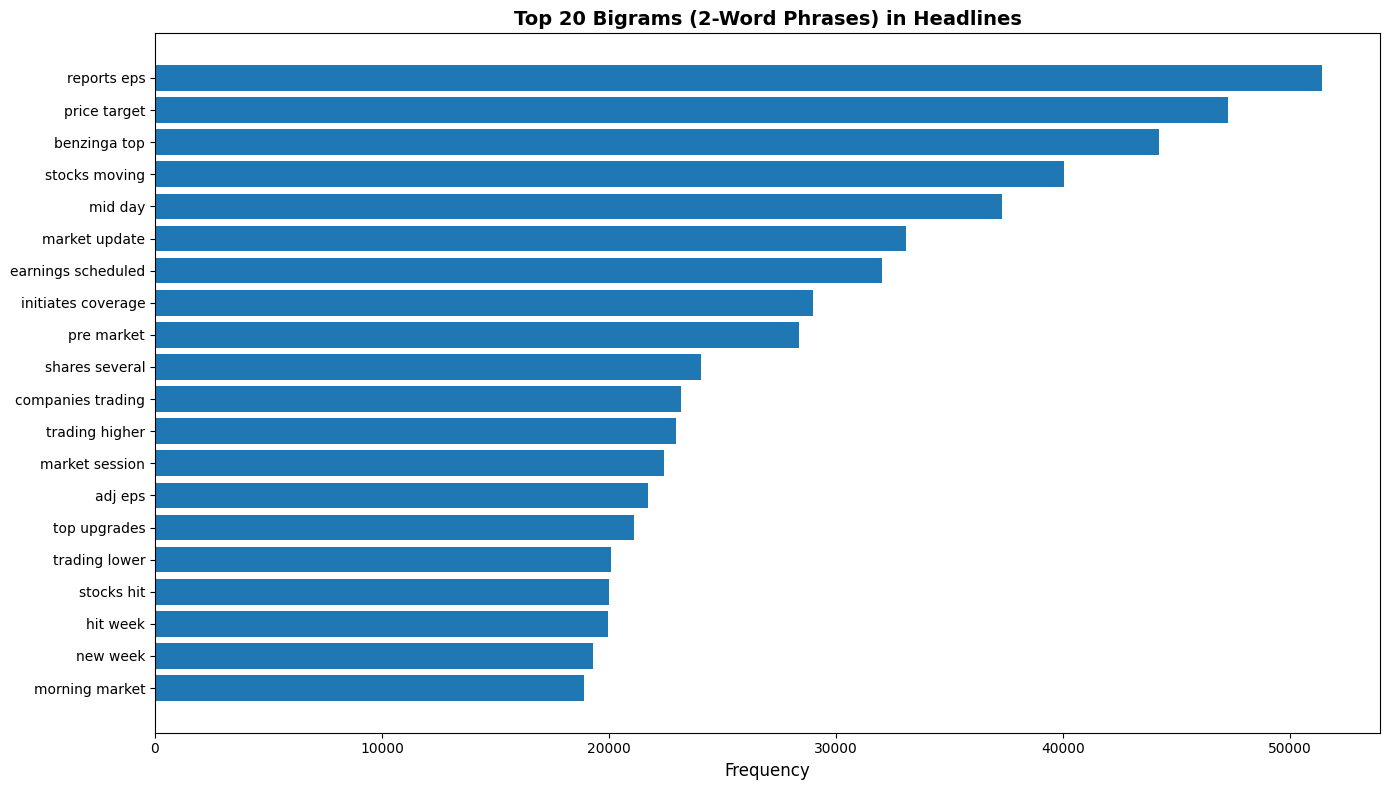

In [24]:
# Extract Bigrams (2-word phrases) for meaningful phrases
from collections import Counter

def extract_bigrams(text):
    """Extract meaningful 2-word phrases"""
    words = clean_and_extract_words(text)
    # Create bigrams from filtered words
    bigrams = []
    for i in range(len(words) - 1):
        if len(words[i]) > 2 and len(words[i+1]) > 2:  # Filter very short words
            bigrams.append(f"{words[i]} {words[i+1]}")
    return bigrams

# Extract bigrams from all headlines
all_bigrams = []
for headline in df['headline']:
    all_bigrams.extend(extract_bigrams(headline))

# Count bigrams
bigram_counts = Counter(all_bigrams).most_common(30)

print("=" * 60)
print("TOP 30 BIGRAMS (2-WORD PHRASES)")
print("=" * 60)
for phrase, count in bigram_counts:
    print(f"{phrase}: {count:,}")

# Visualize top bigrams
words_bg, counts_bg = zip(*bigram_counts[:20])
plt.figure(figsize=(14, 8))
plt.barh(range(len(words_bg)), counts_bg)
plt.yticks(range(len(words_bg)), words_bg)
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 20 Bigrams (2-Word Phrases) in Headlines', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

SPECIFIC EVENTS/KEYWORDS ANALYSIS
Analyst rating: 241,970 articles (17.19%)
Earnings: 232,238 articles (16.50%)
Price target: 215,088 articles (15.28%)
Partnership: 40,601 articles (2.88%)
Acquisition: 31,506 articles (2.24%)
Market crash: 30,269 articles (2.15%)
Stock split: 23,240 articles (1.65%)
FDA approval: 16,606 articles (1.18%)
Product launch: 12,780 articles (0.91%)
IPO: 8,406 articles (0.60%)


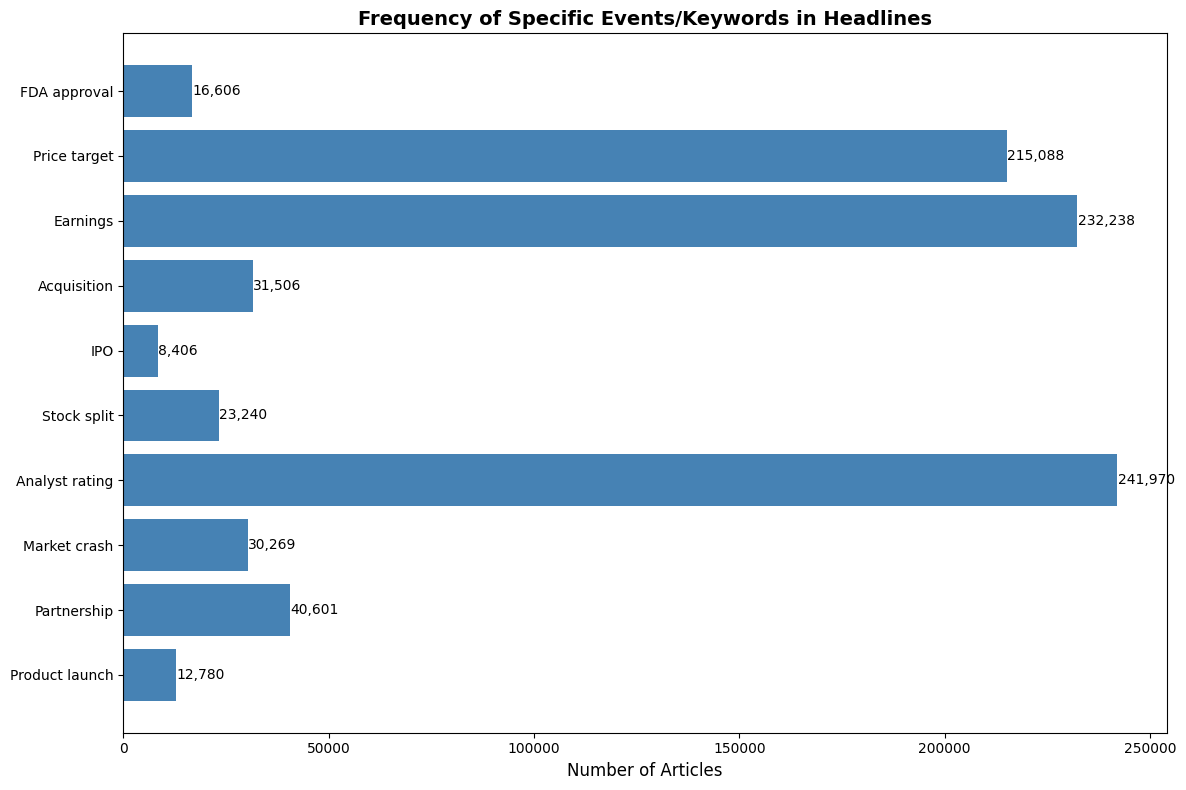

In [26]:
# Search for Specific Events/Keywords (FDA approval, price target, earnings, etc.)
specific_keywords = {
    'FDA approval': ['fda', 'approval', 'approved'],
    'Price target': ['price target', 'target price', 'pt', 'price'],
    'Earnings': ['earnings', 'eps', 'revenue', 'profit'],
    'Acquisition': ['acquisition', 'acquire', 'merger', 'buyout'],
    'IPO': ['ipo', 'initial public offering', 'going public'],
    'Stock split': ['stock split', 'split', 'dividend'],
    'Analyst rating': ['upgrade', 'downgrade', 'rating', 'buy', 'sell', 'hold'],
    'Market crash': ['crash', 'plunge', 'drop', 'fall', 'decline'],
    'Partnership': ['partnership', 'partner', 'collaboration', 'deal'],
    'Product launch': ['launch', 'release', 'unveil', 'introduce']
}

# Function to search for keywords in headlines
def search_keywords(headline, keywords):
    headline_lower = str(headline).lower()
    matches = []
    for keyword in keywords:
        if keyword in headline_lower:
            matches.append(keyword)
    return matches

# Count occurrences of each event type
event_counts = {}
for event_name, keywords in specific_keywords.items():
    count = 0
    for headline in df['headline']:
        if search_keywords(headline, keywords):
            count += 1
    event_counts[event_name] = count

# Display results
print("=" * 60)
print("SPECIFIC EVENTS/KEYWORDS ANALYSIS")
print("=" * 60)
for event, count in sorted(event_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(df)) * 100
    print(f"{event}: {count:,} articles ({percentage:.2f}%)")

# Visualize
events = list(event_counts.keys())
counts = list(event_counts.values())
plt.figure(figsize=(12, 8))
plt.barh(events, counts, color='steelblue')
plt.xlabel('Number of Articles', fontsize=12)
plt.title('Frequency of Specific Events/Keywords in Headlines', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(counts):
    plt.text(v + 100, i, f'{v:,}', va='center')
plt.tight_layout()
plt.show()

In [27]:
# Topic Modeling using LDA (Latent Dirichlet Allocation)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

# Prepare text data (sample for performance - LDA on 1.4M rows is very slow)
# Use a sample of 50,000 headlines for topic modeling
sample_size = min(50000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

print(f"Using {sample_size:,} headlines for topic modeling...")

# Create document-term matrix
vectorizer = CountVectorizer(
    max_features=1000,  # Top 1000 words
    stop_words='english',
    min_df=5,  # Word must appear in at least 5 documents
    max_df=0.7  # Word must appear in less than 70% of documents
)

# Clean headlines for topic modeling
def clean_for_lda(text):
    words = clean_and_extract_words(text)
    return ' '.join(words)

df_sample['cleaned_text'] = df_sample['headline'].apply(clean_for_lda)
doc_term_matrix = vectorizer.fit_transform(df_sample['cleaned_text'])

# Apply LDA
n_topics = 10  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10)
lda.fit(doc_term_matrix)

# Display topics
print("\n" + "=" * 60)
print(f"TOP {n_topics} TOPICS IDENTIFIED BY LDA")
print("=" * 60)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # Top 10 words
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx + 1}: {', '.join(top_words)}")

Using 50,000 headlines for topic modeling...

TOP 10 TOPICS IDENTIFIED BY LDA

Topic 1: shares, trading, companies, higher, update, oil, following, lower, market, amid

Topic 2: etfs, watch, stocks, etf, goldman, sachs, pro, benzinga, picks, trade

Topic 3: pt, buy, price, target, maintains, raises, initiates, lowers, downgrades, neutral

Topic 4: announces, says, new, reports, ceo, share, deal, offering, stock, energy

Topic 5: stocks, week, market, session, day, moving, mid, pre, new, friday

Topic 6: vs, est, eps, reports, sales, sees, earnings, scheduled, revenue, adj

Topic 7: sales, estimate, eps, beat, growth, beats, industries, yoy, shares, expected

Topic 8: benzinga, downgrades, upgrades, industry, stocks, highest, news, cap, shows, stake

Topic 9: earnings, market, markets, update, stock, alert, option, analyst, morning, ahead

Topic 10: share, credit, dividend, volume, suisse, hearing, terms, options, disclosed, outperform


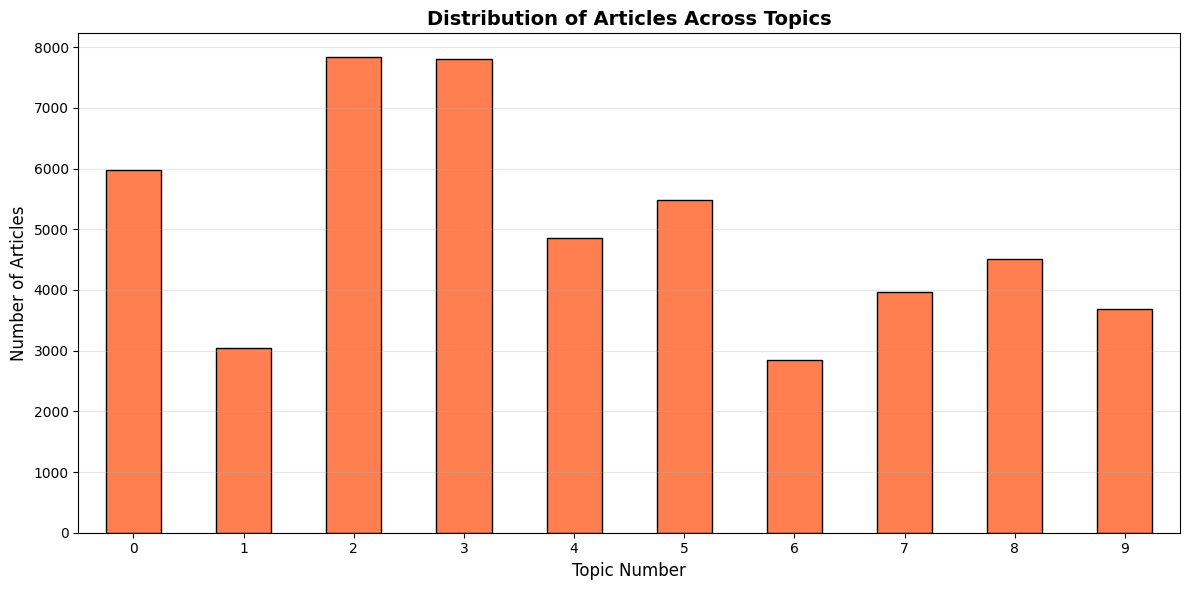


TOPIC DISTRIBUTION
Topic 1: 5,981 articles (11.96%)
Topic 2: 3,036 articles (6.07%)
Topic 3: 7,836 articles (15.67%)
Topic 4: 7,802 articles (15.60%)
Topic 5: 4,858 articles (9.72%)
Topic 6: 5,475 articles (10.95%)
Topic 7: 2,847 articles (5.69%)
Topic 8: 3,973 articles (7.95%)
Topic 9: 4,505 articles (9.01%)
Topic 10: 3,687 articles (7.37%)


In [28]:
# Visualize Topics
# Get topic distribution for each document
topic_distributions = lda.transform(doc_term_matrix)

# Find dominant topic for each headline
df_sample['dominant_topic'] = topic_distributions.argmax(axis=1)

# Count articles per topic
topic_counts = df_sample['dominant_topic'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Articles Across Topics', fontsize=14, fontweight='bold')
plt.xlabel('Topic Number', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("TOPIC DISTRIBUTION")
print("=" * 60)
for topic_num, count in topic_counts.items():
    percentage = (count / len(df_sample)) * 100
    print(f"Topic {topic_num + 1}: {count:,} articles ({percentage:.2f}%)")

KEYWORD-BASED TOPIC CATEGORIZATION
Stock Performance: 336,156 articles (23.89%)
Other: 279,371 articles (19.85%)
Earnings & Financials: 277,276 articles (19.70%)
Analyst Ratings: 272,181 articles (19.34%)
Company News: 123,530 articles (8.78%)
Technology: 64,728 articles (4.60%)
FDA & Healthcare: 20,970 articles (1.49%)
Mergers & Acquisitions: 16,963 articles (1.21%)
Product Launches: 8,823 articles (0.63%)
Partnerships: 4,674 articles (0.33%)
IPO & Public Offerings: 2,656 articles (0.19%)


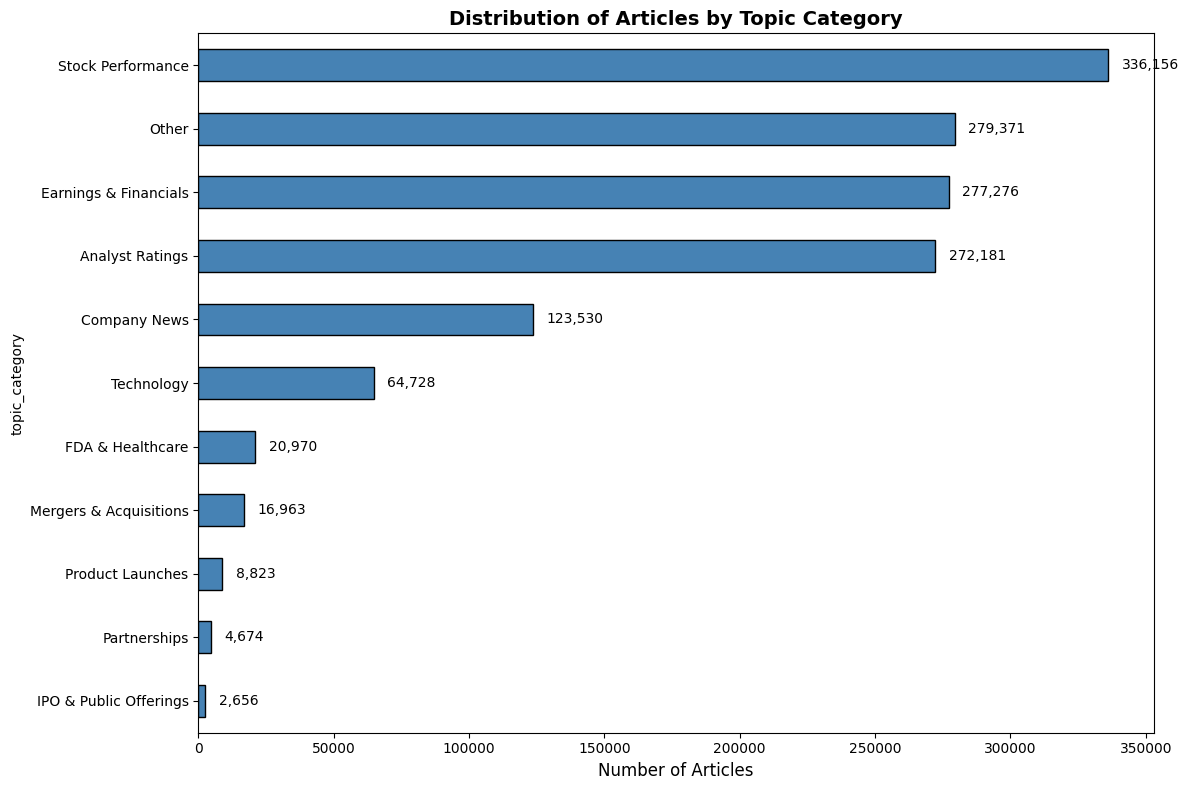

In [29]:
# Alternative: Simple keyword-based topic categorization
# This is faster and more interpretable than LDA for large datasets

topic_keywords = {
    'Earnings & Financials': ['earnings', 'revenue', 'profit', 'eps', 'quarterly', 'financial', 'results'],
    'Analyst Ratings': ['upgrade', 'downgrade', 'rating', 'analyst', 'buy', 'sell', 'hold', 'target'],
    'Stock Performance': ['stock', 'shares', 'trading', 'market', 'price', 'gain', 'loss', 'surge', 'drop'],
    'Company News': ['company', 'corp', 'inc', 'announces', 'reports', 'says'],
    'FDA & Healthcare': ['fda', 'approval', 'drug', 'clinical', 'trial', 'health', 'medical'],
    'Technology': ['tech', 'software', 'platform', 'digital', 'cloud', 'ai', 'technology'],
    'Mergers & Acquisitions': ['acquisition', 'merger', 'acquire', 'buyout', 'deal', 'takeover'],
    'IPO & Public Offerings': ['ipo', 'public offering', 'going public', 'listing'],
    'Partnerships': ['partnership', 'partner', 'collaboration', 'alliance', 'deal'],
    'Product Launches': ['launch', 'release', 'unveil', 'introduce', 'product', 'service']
}

def categorize_headline(headline):
    headline_lower = str(headline).lower()
    for topic, keywords in topic_keywords.items():
        if any(keyword in headline_lower for keyword in keywords):
            return topic
    return 'Other'

# Categorize all headlines
df['topic_category'] = df['headline'].apply(categorize_headline)

# Count articles per topic category
topic_category_counts = df['topic_category'].value_counts()

print("=" * 60)
print("KEYWORD-BASED TOPIC CATEGORIZATION")
print("=" * 60)
for topic, count in topic_category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{topic}: {count:,} articles ({percentage:.2f}%)")

# Visualize
plt.figure(figsize=(12, 8))
topic_category_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Number of Articles', fontsize=12)
plt.title('Distribution of Articles by Topic Category', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(topic_category_counts.values):
    plt.text(v + 5000, i, f'{v:,}', va='center')
plt.tight_layout()
plt.show()

In [30]:
# STEP 1: First, let's see what the publisher column looks like
# We need to check if publishers are email addresses or just names
print("=" * 70)
print("STEP 1: EXAMINING PUBLISHER COLUMN")
print("=" * 70)
print("\nSample of publisher values:")
print(df['publisher'].head(20))
print(f"\nTotal unique publishers: {df['publisher'].nunique()}")
print(f"\nSample of unique publishers:")
print(df['publisher'].unique()[:20])

STEP 1: EXAMINING PUBLISHER COLUMN

Sample of publisher values:
0           Benzinga Insights
1           Benzinga Insights
2                  Lisa Levin
3                  Lisa Levin
4                  Vick Meyer
5     vishwanath@benzinga.com
6     vishwanath@benzinga.com
7           Benzinga Newsdesk
8     vishwanath@benzinga.com
9                  Lisa Levin
10                 Lisa Levin
11    vishwanath@benzinga.com
12               Tyree Gorges
13          Benzinga Newsdesk
14          Benzinga Newsdesk
15                 Lisa Levin
16              Luke J Jacobi
17               Wayne Duggan
18          Benzinga Newsdesk
19               Wayne Duggan
Name: publisher, dtype: object

Total unique publishers: 1034

Sample of unique publishers:
['Benzinga Insights' 'Lisa Levin' 'Vick Meyer' 'vishwanath@benzinga.com'
 'Benzinga Newsdesk' 'Tyree Gorges' 'Luke J Jacobi' 'Wayne Duggan'
 'Shivdeep Dhaliwal' 'luke@benzinga.com' 'Benzinga_Newsdesk'
 'Spencer Israel' 'Joel Elconin' 'Charles G

In [31]:
# STEP 2: Check if any publishers contain '@' symbol (email indicator)
# This tells us if publishers are email addresses
print("=" * 70)
print("STEP 2: CHECKING IF PUBLISHERS ARE EMAIL ADDRESSES")
print("=" * 70)

# Count how many publishers contain '@' symbol
contains_at = df['publisher'].str.contains('@', na=False)
email_count = contains_at.sum()
total_count = len(df)

print(f"\nPublishers containing '@' symbol: {email_count:,} ({email_count/total_count*100:.2f}%)")
print(f"Publishers without '@' symbol: {total_count - email_count:,} ({(total_count-email_count)/total_count*100:.2f}%)")

# Show examples of publishers with '@'
if email_count > 0:
    print("\n📧 Examples of publishers that ARE email addresses:")
    email_examples = df[contains_at]['publisher'].unique()[:10]
    for example in email_examples:
        print(f"   • {example}")
else:
    print("\n⚠️  No email addresses found in publisher column")
    print("   Publishers appear to be organization names, not email addresses")

STEP 2: CHECKING IF PUBLISHERS ARE EMAIL ADDRESSES

Publishers containing '@' symbol: 8,088 (0.57%)
Publishers without '@' symbol: 1,399,240 (99.43%)

📧 Examples of publishers that ARE email addresses:
   • vishwanath@benzinga.com
   • luke@benzinga.com
   • vivek.proactive@gmail.com
   • bret.kenwell@benzinga.com
   • richa28dhand@gmail.com
   • Andy@andyswan.com
   • kiana@investdiva.com
   • adam@eosdetroit.io
   • andrew@tothetick.com
   • newsdesk+benzingastaffwriter3@benzinga.com


In [32]:
# STEP 3: Extract email domains (if publishers are emails)
# Domain = the part after '@' in an email address
# Example: "john@example.com" → domain is "example.com"

print("=" * 70)
print("STEP 3: EXTRACTING EMAIL DOMAINS")
print("=" * 70)

def extract_domain(publisher):
    """
    This function extracts the domain from an email address.
    
    How it works:
    1. Check if publisher contains '@' (is it an email?)
    2. If yes, split by '@' and take the part after '@' (the domain)
    3. If no, return None (not an email)
    
    Example:
    - Input: "reporter@bloomberg.com"
    - Output: "bloomberg.com"
    """
    if pd.isna(publisher):
        return None
    publisher_str = str(publisher)
    if '@' in publisher_str:
        # Split by '@' and take the part after '@'
        domain = publisher_str.split('@')[1]
        return domain.lower().strip()  # Convert to lowercase for consistency
    return None

# Apply the function to extract domains
df['email_domain'] = df['publisher'].apply(extract_domain)

# Count how many domains we extracted
domains_extracted = df['email_domain'].notna().sum()
print(f"\n✅ Successfully extracted domains from {domains_extracted:,} publishers")
print(f"   ({domains_extracted/total_count*100:.2f}% of all publishers)")

# Show examples
if domains_extracted > 0:
    print("\n📧 Examples of extracted domains:")
    domain_examples = df[df['email_domain'].notna()]['email_domain'].unique()[:15]
    for example in domain_examples:
        count = (df['email_domain'] == example).sum()
        print(f"   • {example} ({count:,} articles)")

STEP 3: EXTRACTING EMAIL DOMAINS

✅ Successfully extracted domains from 8,088 publishers
   (0.57% of all publishers)

📧 Examples of extracted domains:
   • benzinga.com (7,937 articles)
   • gmail.com (139 articles)
   • andyswan.com (5 articles)
   • investdiva.com (2 articles)
   • eosdetroit.io (1 articles)
   • tothetick.com (2 articles)
   • forextraininggroup.com (1 articles)
   • stockmetrix.net (1 articles)


STEP 4: ANALYZING UNIQUE DOMAINS AND THEIR CONTRIBUTION

📊 Total unique domains found: 8

🏆 Top 20 domains by article count:
----------------------------------------------------------------------
 1. benzinga.com                                7,937 articles (98.13%)
 2. gmail.com                                     139 articles ( 1.72%)
 3. andyswan.com                                    5 articles ( 0.06%)
 4. investdiva.com                                  2 articles ( 0.02%)
 5. tothetick.com                                   2 articles ( 0.02%)
 6. eosdetroit.io                                   1 articles ( 0.01%)
 7. forextraininggroup.com                          1 articles ( 0.01%)
 8. stockmetrix.net                                 1 articles ( 0.01%)


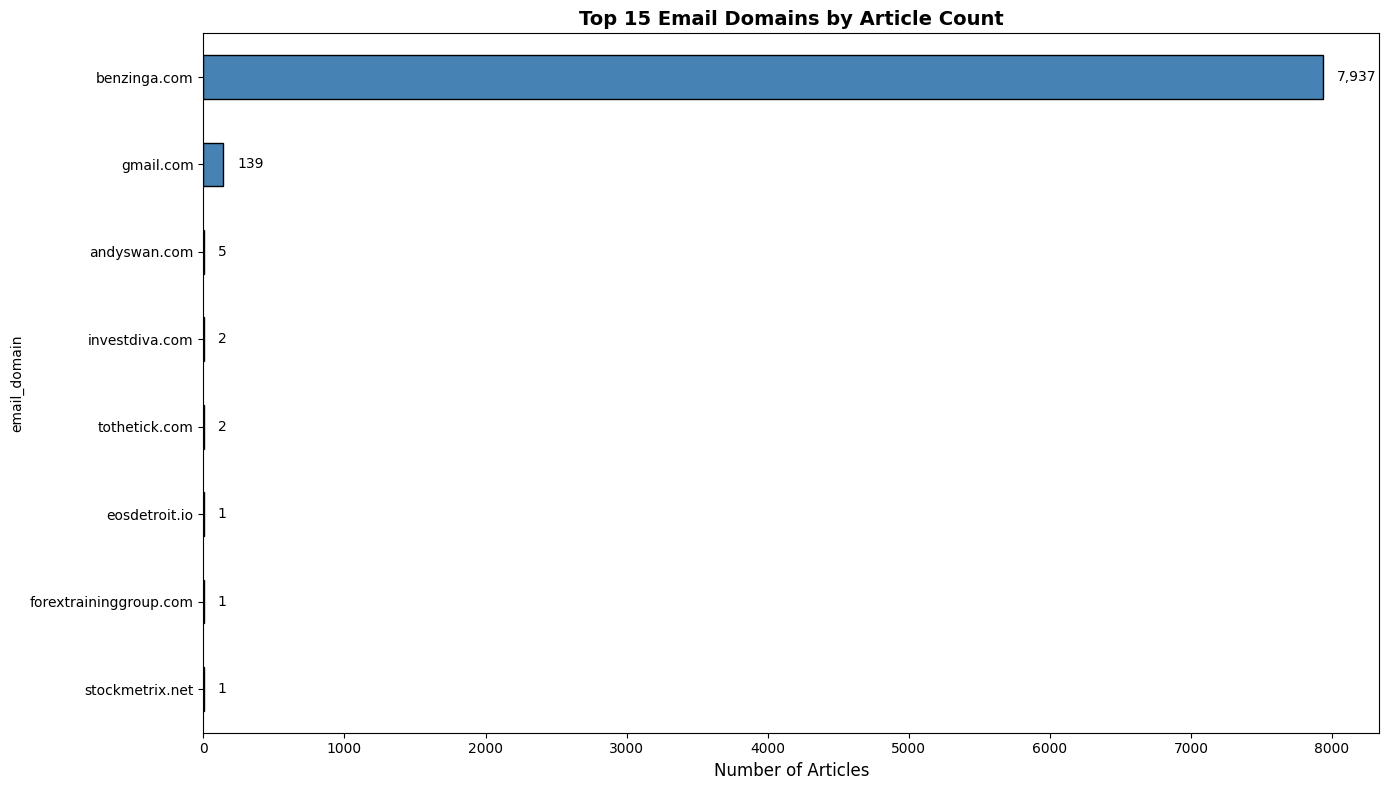

In [33]:
# STEP 4: Analyze unique domains and their contribution
# This tells us which organizations/domains contribute most articles

print("=" * 70)
print("STEP 4: ANALYZING UNIQUE DOMAINS AND THEIR CONTRIBUTION")
print("=" * 70)

# Count articles per domain
domain_counts = df['email_domain'].value_counts()

print(f"\n📊 Total unique domains found: {len(domain_counts)}")
print(f"\n🏆 Top 20 domains by article count:")
print("-" * 70)

for i, (domain, count) in enumerate(domain_counts.head(20).items(), 1):
    percentage = (count / domains_extracted) * 100 if domains_extracted > 0 else 0
    print(f"{i:2d}. {domain:40s} {count:8,} articles ({percentage:5.2f}%)")

# Visualize top domains
if len(domain_counts) > 0:
    plt.figure(figsize=(14, 8))
    top_domains = domain_counts.head(15)
    top_domains.plot(kind='barh', color='steelblue', edgecolor='black')
    plt.xlabel('Number of Articles', fontsize=12)
    plt.title('Top 15 Email Domains by Article Count', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    for i, v in enumerate(top_domains.values):
        plt.text(v + 100, i, f'{v:,}', va='center')
    plt.tight_layout()
    plt.show()

In [34]:
# STEP 5: Compare domain contribution vs publisher contribution
# This shows if certain organizations (domains) dominate the news feed

print("=" * 70)
print("STEP 5: COMPARING DOMAIN CONTRIBUTION")
print("=" * 70)

if domains_extracted > 0:
    # Calculate statistics
    total_articles = len(df)
    domain_articles = domains_extracted
    
    print(f"\n📈 Contribution Statistics:")
    print(f"   • Articles from email domains: {domain_articles:,} ({domain_articles/total_articles*100:.2f}%)")
    print(f"   • Articles from non-email publishers: {total_articles - domain_articles:,} ({(total_articles-domain_articles)/total_articles*100:.2f}%)")
    
    # Top domain's share
    if len(domain_counts) > 0:
        top_domain = domain_counts.index[0]
        top_domain_count = domain_counts.iloc[0]
        top_domain_share = (top_domain_count / domain_articles) * 100
        
        print(f"\n🏅 Top contributing domain:")
        print(f"   • {top_domain}: {top_domain_count:,} articles ({top_domain_share:.2f}% of domain articles)")
        
        # Calculate concentration (how much top 5 domains contribute)
        top_5_domains_count = domain_counts.head(5).sum()
        top_5_share = (top_5_domains_count / domain_articles) * 100
        print(f"\n📊 Concentration Analysis:")
        print(f"   • Top 5 domains contribute: {top_5_domains_count:,} articles ({top_5_share:.2f}% of domain articles)")
        print(f"   • Top 10 domains contribute: {domain_counts.head(10).sum():,} articles ({(domain_counts.head(10).sum()/domain_articles)*100:.2f}% of domain articles)")
else:
    print("\n⚠️  No email domains found to analyze")
    print("   Publishers appear to be organization names, not email addresses")

STEP 5: COMPARING DOMAIN CONTRIBUTION

📈 Contribution Statistics:
   • Articles from email domains: 8,088 (0.57%)
   • Articles from non-email publishers: 1,399,240 (99.43%)

🏅 Top contributing domain:
   • benzinga.com: 7,937 articles (98.13% of domain articles)

📊 Concentration Analysis:
   • Top 5 domains contribute: 8,085 articles (99.96% of domain articles)
   • Top 10 domains contribute: 8,088 articles (100.00% of domain articles)
